## This file is for following along with Chapter 4: Training Linear Models
#### Code is from: https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

In [69]:
import sys
assert sys.version_info >= (3, 5)

import sklearn as sk
assert sk.__version__ >= '0.20'

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# directories for saving
PROJECT_ROOT_DIR = '.'
path = os.getcwd()
print ("The current working directory is %s" % path)
CHAPTER_ID = '4_training_models'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)

# make directory for IMAGES_PATH if does not already exist
try:
    os.mkdir(IMAGES_PATH)
except OSError:
    print ("Creation of the directory %s failed - directory may already exist" % IMAGES_PATH)
else:
    print ("Successfully created the directory %s " % IMAGES_PATH)

def save_fig( fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
             path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
             print( 'Saving figure:', fig_id )
             if tight_layout:
                 plt.tight_layout()
             plt.savefig(path, format = fig_extension, dpi = resolution)

The current working directory is C:\Users\abatzel\repos\Hands_on_ML
Creation of the directory .\images\4_training_models failed - directory may already exist


#### Linear regression using the normal equation

Saving figure: generated_data_plot


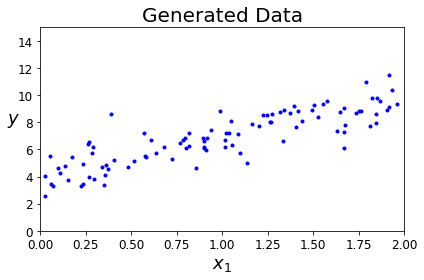

In [41]:
np.random.seed(40)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, 'b.')
plt.title('Generated Data', fontsize = 20)
plt.axis([0,2,0,15])
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)

save_fig('generated_data_plot')

In [45]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.04761375],
       [2.87128142]])

In [49]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04761375],
       [9.79017658]])

Saving figure: generated_data_with_linear_model_predictions


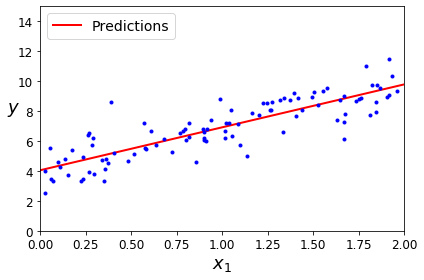

In [57]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

save_fig('generated_data_with_linear_model_predictions')

In [76]:
from sklearn.linear_model import LinearRegression as LR

lin_reg = LR()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.co

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)